<a href="https://colab.research.google.com/github/varunganta/Deep-Learning/blob/main/MNIST_Classifier_using_CNNs_using_Data_Augumentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
dataset = mnist.load_data()
dataset

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Dataset shapes

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
y_train.shape

(60000,)

In [10]:
x_test.shape

(10000, 28, 28)

In [11]:
y_test.shape

(10000,)

In [12]:
x_train.max()

255

In [13]:
x_train.min()

0

In [14]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

#Plotting image

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [16]:
def plot_image(img):
  plt.imshow(img, cmap ='Greys')
  plt.show()

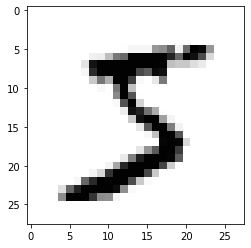

In [17]:
plot_image(x_train[0])

In [18]:
y_train[0]

5

In [19]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [20]:
y_train.shape

(60000, 10)

In [21]:
y_test.shape

(10000, 10)

In [22]:
x_train = x_train / 255
x_test = x_test / 255

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [23]:
x_train.shape

(60000, 28, 28, 1)

In [24]:
x_test.shape

(10000, 28, 28, 1)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

model = Sequential()
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=10, activation="softmax"))

#without data augmentation

In [26]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"])

In [28]:
history1 = model.fit(x_train, y_train, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 84s 45ms/step - loss: 0.0490 - accuracy: 0.9872 - val_loss: 0.0546 - val_accuracy: 0.9826
Epoch 2/10
1875/1875 [==============================] - 85s 45ms/step - loss: 0.0473 - accuracy: 0.9879 - val_loss: 0.0306 - val_accuracy: 0.9897
Epoch 3/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.0438 - accuracy: 0.9882 - val_loss: 0.0407 - val_accuracy: 0.9883
Epoch 4/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.0443 - accuracy: 0.9882 - val_loss: 0.0333 - val_accuracy: 0.9900
Epoch 5/10
1875/1875 [==============================] - 85s 46ms/step - loss: 0.0409 - accuracy: 0.9891 - val_loss: 0.0444 - val_accuracy: 0.9871
Epoch 6/10
1875/1875 [==============================] - 85s 45ms/step - loss: 0.0393 - accuracy: 0.9893 - val_loss: 0.0405 - val_accuracy: 0.9884
Epoch 7/10
1875/1875 [==============================] - 85s 45ms/step - loss: 0.0372 - accuracy: 0.9901 - val_loss: 0.0426 -

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 25)        250       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 25)        100       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 25)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 25)        5650      
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 25)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 25)        100       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 25)          0

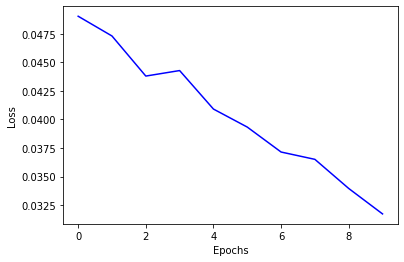

In [30]:
loss = history1.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

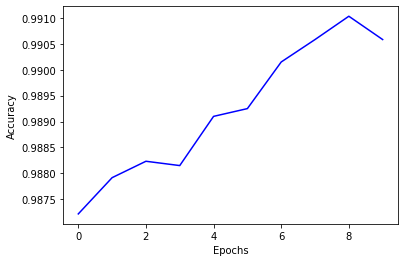

In [31]:
acc = history1.history['accuracy']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

#with data augmentation

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10, 
    zoom_range=0.1,  
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    horizontal_flip=True,  
    vertical_flip=False, 
)  

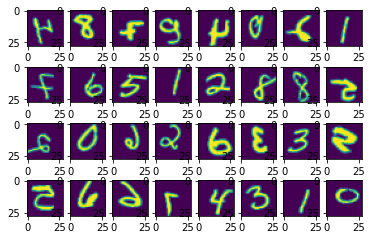

In [33]:
import matplotlib.pyplot as plt
import numpy as np
batch_size = 32
img_iter = datagen.flow(x_train, y_train, batch_size=batch_size)

x, y = img_iter.next()
fig, ax = plt.subplots(nrows=4, ncols=8)
for i in range(batch_size):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()

In [34]:
datagen.fit(x_train)

In [35]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
history2 = model.fit(img_iter,
          epochs=30,
          steps_per_epoch=len(x_train)/batch_size, 
          validation_data=(x_test, y_test))

Epoch 1/30
1875/1875 [==============================] - 104s 55ms/step - loss: 0.4111 - accuracy: 0.8724 - val_loss: 0.0641 - val_accuracy: 0.9820
Epoch 2/30
1875/1875 [==============================] - 102s 54ms/step - loss: 0.2314 - accuracy: 0.9321 - val_loss: 0.0789 - val_accuracy: 0.9764
Epoch 3/30
1875/1875 [==============================] - 103s 55ms/step - loss: 0.1979 - accuracy: 0.9419 - val_loss: 0.0580 - val_accuracy: 0.9817
Epoch 4/30
1875/1875 [==============================] - 101s 54ms/step - loss: 0.1799 - accuracy: 0.9474 - val_loss: 0.0760 - val_accuracy: 0.9787
Epoch 5/30
1875/1875 [==============================] - 102s 54ms/step - loss: 0.1667 - accuracy: 0.9512 - val_loss: 0.1013 - val_accuracy: 0.9737
Epoch 6/30
1875/1875 [==============================] - 102s 54ms/step - loss: 0.1585 - accuracy: 0.9560 - val_loss: 0.0584 - val_accuracy: 0.9809
Epoch 7/30
1875/1875 [==============================] - 102s 54ms/step - loss: 0.1481 - accuracy: 0.9575 - val_loss: 0

In [37]:
history2

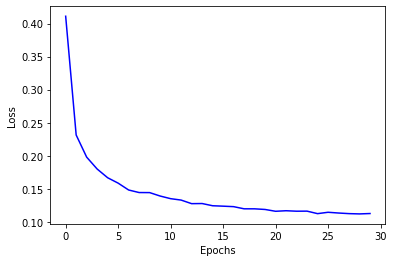

In [38]:
loss = history2.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

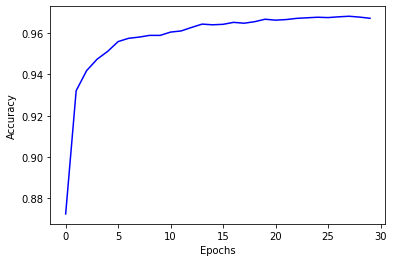

In [39]:
acc = history2.history['accuracy']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()